In [20]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [21]:
df = pd.read_csv("E:\\Feature engineering\\Datasets\\house_price.csv" , usecols=['Neighborhood', 'Exterior1st','Exterior2nd','SalePrice'])

In [22]:
df.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.iloc[: , :]
y = df.iloc[: , -1]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
615,NAmes,MetalSd,MetalSd,137500
613,Mitchel,VinylSd,VinylSd,147000
1303,Somerst,VinylSd,VinylSd,232000
486,NAmes,MetalSd,MetalSd,156000
561,Mitchel,HdBoard,HdBoard,170000


### Mean encoding Just to collect the mean values 

In [9]:
for i in X_train.columns:
    print(i , ':' , len(X_train[i].unique()) , ' labels')

Neighborhood : 25  labels
Exterior1st : 14  labels
Exterior2nd : 16  labels
SalePrice : 521  labels


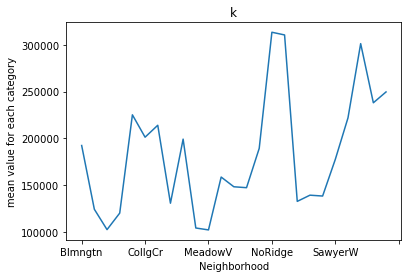

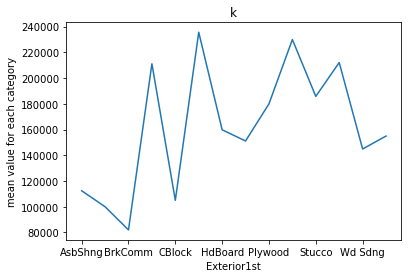

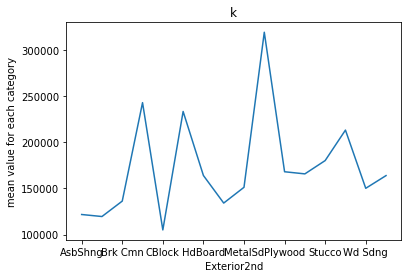

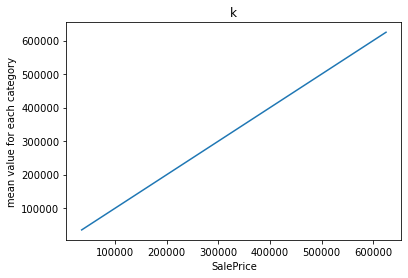

In [10]:
for i in X_train.columns:
    fig = plt.figure()
    X_train.groupby([i])['SalePrice'].mean().plot()
    plt.title("k")
    plt.ylabel('mean value for each category')
    plt.show()

### Using pandas 

<AxesSubplot:xlabel='Neighborhood'>

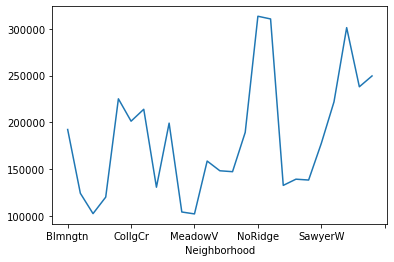

In [12]:
X_train.groupby(['Neighborhood'])['SalePrice'].mean().plot()

In [14]:
val = X_train.groupby(['Neighborhood'])['SalePrice'].mean().to_dict()

In [15]:
val

{'Blmngtn': 192309.6923076923,
 'Blueste': 124000.0,
 'BrDale': 102208.33333333333,
 'BrkSide': 119879.48717948717,
 'ClearCr': 225194.44444444444,
 'CollgCr': 201224.0693069307,
 'Crawfor': 213999.64864864864,
 'Edwards': 130500.93333333333,
 'Gilbert': 199134.64,
 'IDOTRR': 103945.83333333333,
 'MeadowV': 101890.0,
 'Mitchel': 158516.24242424243,
 'NAmes': 148104.59731543623,
 'NPkVill': 147125.0,
 'NWAmes': 189225.58823529413,
 'NoRidge': 313633.6296296296,
 'NridgHt': 310738.78,
 'OldTown': 132457.9125,
 'SWISU': 139098.85714285713,
 'Sawyer': 138186.36363636365,
 'SawyerW': 177444.36111111112,
 'Somerst': 221914.11111111112,
 'StoneBr': 301427.05263157893,
 'Timber': 238072.7037037037,
 'Veenker': 249687.5}

In [16]:
X_train['Neighborhood'] = X_train['Neighborhood'].map(val)
X_test['Neighborhood'] = X_test['Neighborhood'].map(val)

<ipython-input-16-525d0a8d2d65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Neighborhood'] = X_train['Neighborhood'].map(val)
<ipython-input-16-525d0a8d2d65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Neighborhood'] = X_test['Neighborhood'].map(val)


In [17]:
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
615,148104.597315,MetalSd,MetalSd,137500
613,158516.242424,VinylSd,VinylSd,147000
1303,221914.111111,VinylSd,VinylSd,232000
486,148104.597315,MetalSd,MetalSd,156000
561,158516.242424,HdBoard,HdBoard,170000


<AxesSubplot:xlabel='Neighborhood'>

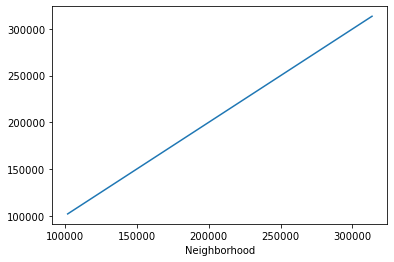

In [18]:
X_train.groupby(['Neighborhood'])['SalePrice'].mean().plot()

### Using Feature-Engine 

In [27]:
from feature_engine.encoding import MeanEncoder

In [28]:
od = MeanEncoder(variables=['Neighborhood','Exterior1st','Exterior2nd'])

In [29]:
od.fit(X_train,y_train)

MeanEncoder(variables=['Neighborhood', 'Exterior1st', 'Exterior2nd'])

In [30]:
od.encoder_dict_

{'Neighborhood': {'Blmngtn': 192309.6923076923,
  'Blueste': 124000.0,
  'BrDale': 102208.33333333333,
  'BrkSide': 119879.48717948717,
  'ClearCr': 225194.44444444444,
  'CollgCr': 201224.0693069307,
  'Crawfor': 213999.64864864864,
  'Edwards': 130500.93333333333,
  'Gilbert': 199134.64,
  'IDOTRR': 103945.83333333333,
  'MeadowV': 101890.0,
  'Mitchel': 158516.24242424243,
  'NAmes': 148104.59731543623,
  'NPkVill': 147125.0,
  'NWAmes': 189225.58823529413,
  'NoRidge': 313633.6296296296,
  'NridgHt': 310738.78,
  'OldTown': 132457.9125,
  'SWISU': 139098.85714285713,
  'Sawyer': 138186.36363636365,
  'SawyerW': 177444.36111111112,
  'Somerst': 221914.11111111112,
  'StoneBr': 301427.05263157893,
  'Timber': 238072.7037037037,
  'Veenker': 249687.5},
 'Exterior1st': {'AsbShng': 112426.66666666667,
  'AsphShn': 100000.0,
  'BrkComm': 82000.0,
  'BrkFace': 211124.24242424243,
  'CBlock': 105000.0,
  'CemntBd': 235642.66666666666,
  'HdBoard': 159823.78523489932,
  'MetalSd': 151124.32

In [31]:
od.variables_

['Neighborhood', 'Exterior1st', 'Exterior2nd']

In [32]:
od.n_features_in_

4

In [33]:
X_train = od.transform(X_train)

In [34]:
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
615,148104.597315,151124.324138,151140.482014,137500
613,158516.242424,212076.332394,213056.524496,147000
1303,221914.111111,212076.332394,213056.524496,232000
486,148104.597315,151124.324138,151140.482014,156000
561,158516.242424,159823.785235,163913.094891,170000


In [35]:
X_test = od.transform(X_test)

C:\Users\korla\anaconda3\envs\TF\lib\site-packages\feature_engine\encoding\base_encoder.py:157: UserWarning: NaN values were introduced in the returned dataframe by the encoder.This means that some of the categories in the input dataframe were not present in the training set used when the fit method was called. Thus, mappings for those categories do not exist. Try using the RareLabelCategoricalEncoder to remove infrequent categories before calling this encoder.
  warnings.warn(


In [37]:
X_test.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
892,138186.363636,159823.785235,163913.094891,154500
1105,313633.629630,159823.785235,163913.094891,325000
413,132457.912500,154956.666667,163810.344828,115000
522,119879.487179,235642.666667,233225.368421,159000
1036,238072.703704,212076.332394,213056.524496,315500
